In [ ]:
pip install --upgrade google-cloud-storage

     |████████████████████████████████| 106 kB 14.5 MB/s 
     |████████████████████████████████| 75 kB 1.2 MB/s 
     |████████████████████████████████| 109 kB 66.7 MB/s 
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.26.3
    Uninstalling google-api-core-1.26.3:
      Successfully uninstalled google-api-core-1.26.3
  Attempting uninstall: google-resumable-media
    Found existing installation: google-resumable-media 0.4.1
    Uninstalling google-resumable-media-0.4.1:
      Successfully uninstalled google-resumable-media-0.4.1
  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 1.0.3
    Uninstalling google-cloud-core-1.0.3:
      Successfully uninstalled google-cloud-core-1.0.3
  Attempting uninstall: google-cloud-storage
    Found existing installation: google-cloud-storage 1.18.1
    Uninstalling google-cloud-storage-1.18.1:
      Successfully uninstalled google-cloud-storage-1.18.1
ERROR: pip's d

In [ ]:
import os
from argparse import Namespace
from collections import Counter
import json
import re
import string
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm_notebook

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install allennlp

     |████████████████████████████████| 738 kB 14.5 MB/s 
     |████████████████████████████████| 259 kB 68.7 MB/s 
     |████████████████████████████████| 61 kB 705 kB/s 
     |████████████████████████████████| 124 kB 58.0 MB/s 
     |████████████████████████████████| 1.7 MB 75.1 MB/s 
     |████████████████████████████████| 190 kB 60.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 12.1 MB 22.5 MB/s 
     |████████████████████████████████| 1.2 MB 62.2 MB/s 
     |████████████████████████████████| 3.1 MB 76.2 MB/s 
     |████████████████████████████████| 298 kB 76.0 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 167 kB 70.1 MB/s 
     |████████████████████████████████| 131 kB 71.7 MB/s 
     |████████████████████████████████| 59 kB 9.9 MB/s 
     |████████████████

In [ ]:
from allennlp.modules.elmo import Elmo, batch_to_ids

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [ ]:
!unzip -q "/content/gdrive/MyDrive/final_cit_map_function.zip" 

In [ ]:
!unzip -q "/content/gdrive/MyDrive/archive (2).zip"

In [ ]:
citation = pd.DataFrame(columns=['Text_Tokens','Cit_func','citseg_id'])

In [ ]:
import os
paths=[]
d = "/content/per_func_map_organised_small"
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        paths.append(full_path)

In [ ]:
for i in range(len(paths)):
  path = paths[i]
  print(path)
  f=open(path)
  data=json.load(f)
  for i in data.values():
    citation_contexts=i['citation_contexts']
    for j in range(len(citation_contexts)):
      a=[]
      tokens=citation_contexts[j]['citance']['tokens_pp']
      for cit_refs in range(len(citation_contexts[j]['cit_refs'])):
         citseg_id=citation_contexts[j]['cit_refs'][cit_refs]['citseg_id']
         if citseg_id not in  a:
            a.append(citseg_id)
            c=citation_contexts[j]['cit_refs'][cit_refs]['citseg_id']
            f=citation_contexts[j]['cit_refs'][cit_refs]['function_agreed']
            citation = citation.append({'Text_Tokens':tokens, 'Cit_func':f,'citseg_id':c},ignore_index=True)

/content/per_func_map_organised_small/CoCoGM.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCoR0.per_func.map_organised_small.json
/content/per_func_map_organised_small/PSup.per_func.map_organised_small.json
/content/per_func_map_organised_small/PSim.per_func.map_organised_small.json
/content/per_func_map_organised_small/PMot.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCoXY.per_func.map_organised_small.json
/content/per_func_map_organised_small/Weak.per_func.map_organised_small.json
/content/per_func_map_organised_small/PModi.per_func.map_organised_small.json
/content/per_func_map_organised_small/Future.per_func.map_organised_small.json
/content/per_func_map_organised_small/Neut.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCo-.per_func.map_organised_small.json
/content/per_func_map_organised_small/PUse.per_func.map_organised_small.json
/content/per_func_map_organised_small/PBas.per_func.map_organised_

In [ ]:
#split the subset by rating to create new train, val and test splits
import collections
by_rating = collections.defaultdict(list)
for _,row in citation.iterrows():
  by_rating[row.Cit_func].append(row.to_dict())

In [ ]:
#create split data
seed =1021
final_list = []
np.random.seed(seed)
train_proportion = 0.8
val_proportion = 0.2
#test_proportion = 0.05

for _, item_list in sorted(by_rating.items()):
  np.random.shuffle(item_list)

  n_total = len(item_list)
  n_train = int(train_proportion * n_total)
  n_val = int(val_proportion * n_total)
  #n_test = int(test_proportion * n_total)


  #give data points  split attribute

  for item in item_list[:n_train]:
    item['split'] = 'train'

  #for item in item_list[n_train:n_train+n_val]:
   # item['split'] = 'val'

  for item in item_list[n_train:n_train+n_val]:
    item['split'] = 'val'

  #for item in item_list[n_train+n_val:n_train+n_val+n_test]:
   # item['split'] = 'test'


  #Add to final list

  final_list.extend(item_list)


final_citation = pd.DataFrame(final_list)

In [ ]:
final_citation.isna().any()

Text_Tokens    False
Cit_func       False
citseg_id      False
split           True
dtype: bool

In [ ]:
final_citation.isnull().sum()

Text_Tokens     0
Cit_func        0
citseg_id       0
split          10
dtype: int64

In [ ]:
final_citation=final_citation.dropna()

In [ ]:
display(final_citation.Cit_func.value_counts())                   # Inspecting the Number of Ratings.
print(" ")

Neut      1475
PUse       761
CoCoGM     300
PMot       290
PSim       210
Weak       160
CoCoXY     156
PBas       101
PSup       100
CoCoR0     100
Future      85
CoCo-       80
PModi       65
Name: Cit_func, dtype: int64

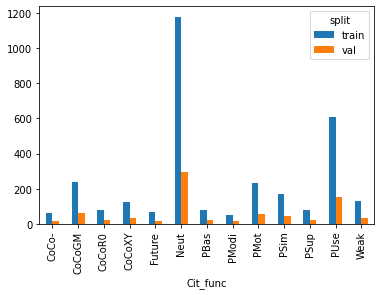

In [ ]:
final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a=final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a.plot(kind='bar')

In [ ]:
final_citation.groupby(['Cit_func','split']).size()

Cit_func  split
CoCo-     train      64
          val        16
CoCoGM    train     240
          val        60
CoCoR0    train      80
          val        20
CoCoXY    train     125
          val        31
Future    train      68
          val        17
Neut      train    1180
          val       295
PBas      train      81
          val        20
PModi     train      52
          val        13
PMot      train     232
          val        58
PSim      train     168
          val        42
PSup      train      80
          val        20
PUse      train     609
          val       152
Weak      train     128
          val        32
dtype: int64

In [ ]:
# final_citation.drop(final_citation.query('Cit_func == "CoCoGM" & split == "train"').sample(n=50).index,inplace=True)

In [ ]:
final_citation.drop(final_citation.query('Cit_func == "Neut" & split == "train"').sample(n=400).index,inplace=True)

In [ ]:
# final_citation.drop(final_citation.query('Cit_func == "PMot" & split == "train"').sample(n=50).index,inplace=True)

In [ ]:
final_citation.drop(final_citation.query('Cit_func == "PUse" & split == "train"').sample(n=200).index,inplace=True)

In [ ]:
# final_citation.drop(final_citation.query('Cit_func == "Neut" & split == "val"').sample(n=100).index,inplace=True)

In [ ]:
# final_citation.groupby(['Cit_func','split']).size()

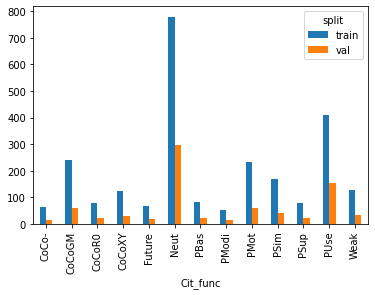

In [ ]:
final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a=final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a.plot(kind='bar')

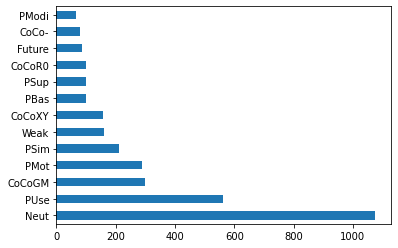

In [ ]:
 final_citation.Cit_func.value_counts().plot(kind='barh')

In [ ]:
display(final_citation.split.value_counts())

train    2507
val       776
Name: split, dtype: int64

In [ ]:
final_citation['Cit_func'].replace({'PSim':'Comparison or Contrast','Neut':'Background','CoCoXY':'Background','Weak':'Comparison or Contrast',
                                    'CoCoGM':'Comparison or Contrast','PUse':'Uses','PBas':'Extends','PModi':'Extends','CoCoR0':'Comparison or Contrast',
                                    'PMot':'Motivation','CoCo-':'Comparison or Contrast','PSup':'Comparison or Contrast'
                                    }, inplace=True)

In [ ]:
final_citation['Cit_func'].unique()

array(['Comparison or Contrast', 'Background', 'Future', 'Extends',
       'Motivation', 'Uses'], dtype=object)

In [ ]:
display(final_citation.split.value_counts())

train    2507
val       776
Name: split, dtype: int64

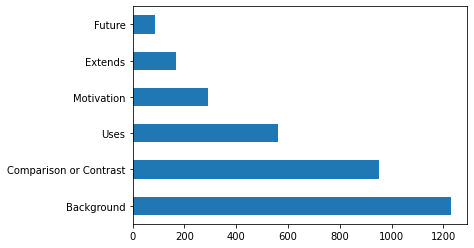

In [ ]:
 final_citation.Cit_func.value_counts().plot(kind='barh')

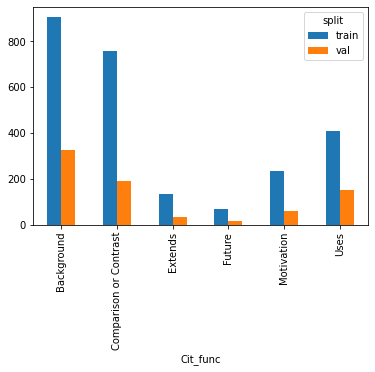

In [ ]:
final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a=final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a.plot(kind='bar')

In [ ]:
final_citation = final_citation.sample(frac=1).reset_index(drop=True)

In [ ]:
class Vocabulary(object):
    """Class to process text and extract vocabulary for mapping"""

    def __init__(self, token_to_idx=None):
        """
        Args:
            token_to_idx (dict): a pre-existing map of tokens to indices
        """

        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx

        self._idx_to_token = {idx: token 
                              for token, idx in self._token_to_idx.items()}
        
    def to_serializable(self):
        """ returns a dictionary that can be serialized """
        return {'token_to_idx': self._token_to_idx}

    @classmethod
    def from_serializable(cls, contents):
        """ instantiates the Vocabulary from a serialized dictionary """
        return cls(**contents)

    def add_token(self, token):
        """Update mapping dicts based on the token.

        Args:
            token (str): the item to add into the Vocabulary
        Returns:
            index (int): the integer corresponding to the token
        """
        if token in self._token_to_idx:
            index = self._token_to_idx[token]
        else:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index#,token
            
    def add_many(self, tokens):
        """Add a list of tokens into the Vocabulary
        
        Args:
            tokens (list): a list of string tokens
        Returns:
            indices (list): a list of indices corresponding to the tokens
        """
        return [self.add_token(token) for token in tokens]

    def lookup_token(self, token):
        """Retrieve the index associated with the token 
        
        Args:
            token (str): the token to look up 
        Returns:
            index (int): the index corresponding to the token
        """
        return self._token_to_idx[token]

    def lookup_index(self, index):
        """Return the token associated with the index
        
        Args: 
            index (int): the index to look up
        Returns:
            token (str): the token corresponding to the index
        Raises:
            KeyError: if the index is not in the Vocabulary
        """
        if index not in self._idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index)
        return self._idx_to_token[index]

    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)

    def __len__(self):
        return len(self._token_to_idx)

In [ ]:
class SequenceVocabulary(Vocabulary):
    def __init__(self, token_to_idx=None, unk_token="<UNK>",
                 mask_token="<MASK>", begin_seq_token="<BEGIN>",
                 end_seq_token="<END>"):

        super(SequenceVocabulary, self).__init__(token_to_idx)

        self._mask_token = mask_token
        self._unk_token = unk_token
        self._begin_seq_token = begin_seq_token
        self._end_seq_token = end_seq_token

        self.mask_index = self.add_token(self._mask_token)
        self.unk_index = self.add_token(self._unk_token)
        self.begin_seq_index = self.add_token(self._begin_seq_token)
        self.end_seq_index = self.add_token(self._end_seq_token)

    def to_serializable(self):
        contents = super(SequenceVocabulary, self).to_serializable()
        contents.update({'unk_token': self._unk_token,
                         'mask_token': self._mask_token,
                         'begin_seq_token': self._begin_seq_token,
                         'end_seq_token': self._end_seq_token})
        return contents

    def lookup_token(self, token):
        """Retrieve the index associated with the token 
          or the UNK index if token isn't present.
        
        Args:
            token (str): the token to look up 
        Returns:
            index (int): the index corresponding to the token
        Notes:
            `unk_index` needs to be >=0 (having been added into the Vocabulary) 
              for the UNK functionality 
        """
        if self.unk_index >= 0:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]

In [ ]:
class CitationVectorizer(object):
    """ The Vectorizer which coordinates the Vocabularies and puts them to use"""    
    def __init__(self, title_vocab, category_vocab):
        self.title_vocab = title_vocab
        self.category_vocab = category_vocab

    def vectorize(self, title, vector_length=-1):
        """
        Args:
            title (str): the string of words separated by a space
            vector_length (int): an argument for forcing the length of index vector
        Returns:
            the vetorized title (numpy.array)
        """
        indices = [self.title_vocab.begin_seq_index]
        indices.extend(self.title_vocab.lookup_token(token) 
                       for token in title)
        indices.append(self.title_vocab.end_seq_index)

        if vector_length < 0:
            vector_length = len(indices)

        out_vector = np.zeros(vector_length, dtype=np.int64)
        out_vector[:len(indices)] = indices
        out_vector[len(indices):] = self.title_vocab.mask_index
        return out_vector

    @classmethod
    def from_dataframe(cls, citation_df, cutoff=0):
        """Instantiate the vectorizer from the dataset dataframe
        
        Args:
            citation_df (pandas.DataFrame): the target dataset
            cutoff (int): frequency threshold for including in Vocabulary 
        Returns:
            an instance of the CitationVectorizer
        """
        category_vocab = Vocabulary()     
        for category in sorted(set(citation_df.Cit_func)):
            category_vocab.add_token(category)
            #a=category_vocab.add_token(category)
            #print(a)
        word_counts = Counter()
        for title in citation_df.Text_Tokens:
          # print("title is %s"%title)
          for token in title:
              # print("token is %s"%token)
              #if token not in string.punctuation:
              word_counts[token] += 1
        
        title_vocab = SequenceVocabulary()
        for word, word_count in word_counts.items():
            # print("word:word_count are %s:%d"%(word,word_count))
            if word_count >= cutoff:
                title_vocab.add_token(word)
        return cls(title_vocab, category_vocab)

    @classmethod
    def from_serializable(cls, contents):
        
        title_vocab = \
            SequenceVocabulary.from_serializable(contents['title_vocab'])
        category_vocab =  \
            Vocabulary.from_serializable(contents['category_vocab'])

        return cls(title_vocab=title_vocab, category_vocab=category_vocab)

    def to_serializable(self):
        return {'title_vocab': self.title_vocab.to_serializable(),
                'category_vocab': self.category_vocab.to_serializable()}

In [ ]:
class CitationDataset(Dataset):
    def __init__(self, citation_df, vectorizer):
        """
        Args:
            citation_df (pandas.DataFrame): the dataset
            vectorizer (CitationVectorizer): vectorizer instatiated from dataset
        """
        self.citation_df = citation_df
        self._vectorizer = vectorizer

        # +1 if only using begin_seq, +2 if using both begin and end seq tokens
        measure_len = lambda context: len(context)
        self._max_seq_length = max(map(measure_len, citation_df.Text_Tokens)) + 2
        

        self.train_df = self.citation_df[self.citation_df.split=='train']
        self.train_size = len(self.train_df)

        self.val_df = self.citation_df[self.citation_df.split=='val']
        self.validation_size = len(self.val_df)

        self.test_df = self.citation_df[self.citation_df.split=='test']
        self.test_size = len(self.test_df)

        self._lookup_dict = {'train': (self.train_df, self.train_size),
                             'val': (self.val_df, self.validation_size),
                             'test': (self.test_df, self.test_size)}

        self.set_split('train')

        # Class weights
        class_counts = citation_df.Cit_func.value_counts().to_dict()
        def sort_key(item):
            return self._vectorizer.category_vocab.lookup_token(item[0])
        sorted_counts = sorted(class_counts.items(), key=sort_key)
        frequencies = [count for _, count in sorted_counts]
        self.class_weights = 1.0 / torch.tensor(frequencies, dtype=torch.float32)

        
        
    @classmethod
    def load_dataset_and_make_vectorizer(cls, citation_csv):
        """Load dataset and make a new vectorizer from scratch
        
        Args:
            citation_csv (str): location of the dataset
        Returns:
            an instance of citationDataset
        """
        citation_df = citation_csv
        train_citation_df = citation_df[citation_df.split=='train']
        return cls(citation_df, CitationVectorizer.from_dataframe(train_citation_df))

    @classmethod
    def load_dataset_and_load_vectorizer(cls, citation_csv, vectorizer_filepath):
        """Load dataset and the corresponding vectorizer. 
        Used in the case in the vectorizer has been cached for re-use
        
        Args:
            surname_csv (str): location of the dataset
            vectorizer_filepath (str): location of the saved vectorizer
        Returns:
            an instance of SurnameDataset
        """
        
        citation_df = citation_csv
        vectorizer = cls.load_vectorizer_only(vectorizer_filepath)
        return cls(citation_csv, vectorizer)

    @staticmethod
    def load_vectorizer_only(vectorizer_filepath):
        """a static method for loading the vectorizer from file
        
        Args:
            vectorizer_filepath (str): the location of the serialized vectorizer
        Returns:
            an instance of functionVectorizer
        """
        with open(vectorizer_filepath) as fp:
            return NameVectorizer.from_serializable(json.load(fp))

    def save_vectorizer(self, vectorizer_filepath):
        """saves the vectorizer to disk using json
        
        Args:
            vectorizer_filepath (str): the location to save the vectorizer
        """
        with open(vectorizer_filepath, "w") as fp:
            json.dump(self._vectorizer.to_serializable(), fp)

    def get_vectorizer(self):
        """ returns the vectorizer """
        return self._vectorizer

    def set_split(self, split="train"):
        """ selects the splits in the dataset using a column in the dataframe """
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]

    def __len__(self):
        return self._target_size

    def __getitem__(self, index):
        """the primary entry point method for PyTorch datasets
        
        Args:
            index (int): the index to the data point 
        Returns:
            a dictionary holding the data point's features (x_data) and label (y_target)
        """
        
        
        row = self._target_df.iloc[index]
        citseg= row.citseg_id

        # title_vector = \
        #     self._vectorizer.vectorize(row.Text_Tokens, self._max_seq_length)

        # category_index = row.Cit_func
        #print(category_index)
        category_index = self._vectorizer.category_vocab.lookup_token(row.Cit_func)
        # print("title_vector")
        title_vector=row.Text_Tokens
        # print(title_vector)
        
        # return {'x_data': title_vector,
        #         'y_target': category_index,
        #         'citseg_id':citseg
        #         }

        return title_vector, category_index , citseg

    def get_num_batches(self, batch_size):
        """Given a batch size, return the number of batches in the dataset
        
        Args:
            batch_size (int)
        Returns:
            number of batches in the dataset
        """
        return len(self) // batch_size

def my_collate(batch):
   print(batch)
   return batch

def batchify(data, bsz, shuffle=False,device="cpu"):
    if shuffle:
        random.shuffle(data)
    sents,tags,citseg = zip(*data)
    nbatch = (len(sents)+bsz-1) // bsz
    # downsample biggest class
    # sents, tags = balance_tags(sents, tags)

    for i in range(nbatch):

        batch = sents[i*bsz:(i+1)*bsz]
        batch1 = batch
        batch_tags = tags[i*bsz:(i+1)*bsz]
        citseg_id  = citseg[i*bsz:(i+1)*bsz]
        batch = batch_to_ids(batch)
        batch_tags = torch.tensor(batch_tags).long()
        citseg_id = torch.tensor(citseg_id).long()
        # lengths = [torch.tensor(l).long() for l in lengths]
        # print("batch")
        # print(batch)
        # print("batch_tags")
        # print(device)
        # print(batch_tags)
        batch=batch.to(device)
        batch_tags=batch_tags.to(device)
        citseg_id = citseg_id.to(device)
        # yield (batch, batch_tags, lengths)
        yield (batch, batch_tags, citseg_id,batch1)

In [ ]:
# bilstm output of citseg
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class CitationClassifier1(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier1, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print("x.shape")
        # print(x.shape)
        packed_output, (hidden, cell) = self.lstm(x)
        packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        out = self.fc1(packed_output)
        out = self.relu(out)
        out = self.fc2(out)
        pred1= self.act(out)
        return pred1

In [ ]:
# h1 + hn + citseg
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class CitationClassifier3(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier3, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim*6, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print("x.shape")
        s=sentences.shape[1]
        packed_output, (hidden, cell) = self.lstm(x)
        h_1 = packed_output[torch.arange(packed_output.size(0)),0]
        h_n = packed_output[torch.arange(packed_output.size(0)),s-1]
        avg_pool = torch.mean(packed_output, 1)
        packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        h_1h_n=torch.cat([h_1,packed_output,h_n],dim=1)
        out = self.fc1(h_1h_n)
        out = self.relu(out)
        out = self.fc2(out)
        pred1= self.act(out)
        return pred1

In [ ]:
# attention
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class Attention(nn.Module):
    def __init__(self, feature_dim, step_dim, bias=True, **kwargs):
        super(Attention, self).__init__(**kwargs)
        
        self.supports_masking = True

        self.bias = bias
        self.feature_dim = feature_dim
        self.step_dim = step_dim
        self.features_dim = 0
        
        weight = torch.zeros(feature_dim, 1)
        nn.init.kaiming_uniform_(weight)
        self.weight = nn.Parameter(weight)
        
        if bias:
            self.b = nn.Parameter(torch.zeros(step_dim))
        
    def forward(self, x, mask=None):
        # print("x.shape")
        # print(x.shape)
        feature_dim = self.feature_dim 
        # print(feature_dim)
        step_dim = self.step_dim
        # print(step_dim)

        eij = torch.mm(x.contiguous().view(-1, feature_dim), self.weight).view(-1, step_dim)
        # print("eij.shape")
        # print(eij.shape)
        
        if self.bias:
            eij = eij + self.b
            
        eij = torch.tanh(eij)
        a = torch.exp(eij)
        
        if mask is not None:
            a = a * mask

        a = a / (torch.sum(a, 1, keepdim=True) + 1e-10)

        weighted_input = x * torch.unsqueeze(a, -1)
        # print("weighted_input.shape")
        # print(weighted_input.shape)
        return (weighted_input)

class CitationClassifier(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        # self.attention_layer = Attention(hidden_dim*2)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print(elmo_out['elmo_representations'][0].shape)
        # print("x.shape")
        # print(x.shape)
        
        packed_output, (hidden, cell) = self.lstm(x)
        l=packed_output.shape[1]
        l=torch.tensor(l)
        l=l.cuda()
        h=torch.tensor(64)
        h=h.cuda()
        self.attention_layer = Attention(h,l).cuda()
        packed_output = self.attention_layer(packed_output)
        # print(packed_output.shape)
        packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        out = self.fc1(packed_output)
        # print(out.shape)
        out = self.relu(out)
        # print(out.shape)
        out = self.fc2(out)
        # print(out.shape)
        pred1= self.act(out)
        # print(pred1.shape)
        return pred1


In [ ]:
def make_train_state(args):
    return {'stop_early': False,
            'early_stopping_step': 0,
            'early_stopping_best_val': 1e8,
            'learning_rate': args.learning_rate,
            'epoch_index': 0,
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'test_loss': -1,
            'test_acc': -1,
            'model_filename': args.model_state_file}

def update_train_state(args, model, train_state):
    """Handle the training state updates.

    Components:
     - Early Stopping: Prevent overfitting.
     - Model Checkpoint: Model is saved if the model is better

    :param args: main arguments
    :param model: model to train
    :param train_state: a dictionary representing the training state values
    :returns:
        a new train_state
    """

    # Save one model at least
    if train_state['epoch_index'] == 0:
        torch.save(model.state_dict(), train_state['model_filename'])
        train_state['stop_early'] = False

    # Save model if performance improved
    elif train_state['epoch_index'] >= 1:
        loss_tm1, loss_t = train_state['val_loss'][-2:]

        # If loss worsened
        if loss_t >= train_state['early_stopping_best_val']:
            # Update step
            train_state['early_stopping_step'] += 1
        # Loss decreased
        else:
            # Save the best model
            if loss_t < train_state['early_stopping_best_val']:
                torch.save(model.state_dict(), train_state['model_filename'])

            # Reset early stopping step
            train_state['early_stopping_step'] = 0

        # Stop early ?
        train_state['stop_early'] = \
            train_state['early_stopping_step'] >= args.early_stopping_criteria

    return train_state

def compute_accuracy(y_pred, y_target):
    _, y_pred_indices = y_pred.max(dim=1)
    n_correct = torch.eq(y_pred_indices, y_target).sum().item()
    return n_correct / len(y_pred_indices) * 100

In [ ]:
def set_seed_everywhere(seed, cuda):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if cuda:
        torch.cuda.manual_seed_all(seed)

def handle_dirs(dirpath):
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)
        
def load_glove_from_file(glove_filepath):
    """
    Load the GloVe embeddings 
    
    Args:
        glove_filepath (str): path to the glove embeddings file 
    Returns:
        word_to_index (dict), embeddings (numpy.ndarary)
    """

    word_to_index = {}
    embeddings = []
    with open(glove_filepath, "r") as fp:
        for index, line in enumerate(fp):
            line = line.split(" ") # each line: word num1 num2 ...
            word_to_index[line[0]] = index # word = line[0] 
            embedding_i = np.array([float(val) for val in line[1:]])
            embeddings.append(embedding_i)
    return word_to_index, np.stack(embeddings)

def make_embedding_matrix(glove_filepath, words):
    """
    Create embedding matrix for a specific set of words.
    
    Args:
        glove_filepath (str): file path to the glove embeddigns
        words (list): list of words in the dataset
    """
    word_to_idx, glove_embeddings = load_glove_from_file(glove_filepath)
    embedding_size = glove_embeddings.shape[1]
    final_embeddings = np.zeros((len(words), embedding_size))

    for i, word in enumerate(words):
        if word in word_to_idx:
            final_embeddings[i, :] = glove_embeddings[word_to_idx[word]]
        else:
            embedding_i = torch.ones(1, embedding_size)
            torch.nn.init.xavier_uniform_(embedding_i)
            final_embeddings[i, :] = embedding_i
    print(final_embeddings)
    print(final_embeddings.shape)
    return final_embeddings

In [ ]:
from argparse import Namespace

In [ ]:
args = Namespace(
    # Data and Path hyper parameters
    citation_csv=final_citation,
    vectorizer_file="vectorizer.json",
    model_state_file="model.pth",
    save_dir="model_storage/ch5/document_classification",
    # Model hyper parameters
    glove_filepath='/content/glove.6B.300d.txt', 
    use_glove=False,
    embedding_size=300, 
    hidden_dim=32,
    # Training hyper parameter
    seed=1337, 
    learning_rate=0.001, 
    dropout_p=0.1, 
    batch_size=30, 
    num_epochs=30, 
    num_layers=2,
    early_stopping_criteria=5, 
    # Runtime option
    cuda=True, 
    catch_keyboard_interrupt=True, 
    reload_from_files=False,
    expand_filepaths_to_save_dir=True
) 

if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir,
                                         args.model_state_file)
    
    print("Expanded filepaths: ")
    print("\t{}".format(args.vectorizer_file))
    print("\t{}".format(args.model_state_file))
    
# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False
    
args.device = torch.device("cuda" if args.cuda else "cpu")
print("Using CUDA: {}".format(args.cuda))

# Set seed for reproducibility
set_seed_everywhere(args.seed, args.cuda)

# handle dirs
handle_dirs(args.save_dir)

Expanded filepaths: 
	model_storage/ch5/document_classification/vectorizer.json
	model_storage/ch5/document_classification/model.pth
Using CUDA: True


In [ ]:
args.use_ELMo = True

In [ ]:
if args.reload_from_files:
    # training from a checkpoint
    dataset = CitationDataset.load_dataset_and_load_vectorizer(args.citation_csv,
                                                              args.vectorizer_file)
else:
    # create dataset and vectorizer
    dataset = CitationDataset.load_dataset_and_make_vectorizer(args.citation_csv)
    dataset.save_vectorizer(args.vectorizer_file)
vectorizer = dataset.get_vectorizer()
print(len(vectorizer.title_vocab))
# Use GloVe or randomly initialized embeddings
if args.use_ELMo:
    words = vectorizer.title_vocab._token_to_idx.keys()
    embeddings = make_embedding_matrix(glove_filepath=args.glove_filepath, 
                                       words=words)
    print("Using pre-trained embeddings")
else:
    print("Not using pre-trained embeddings")
    embeddings = None

classifier = CitationClassifier3(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

print(classifier)

7632
[[-0.11907164 -0.00123771  0.03475953 ...  0.10838436 -0.02188396
  -0.09059642]
 [-0.03658002  0.06027976 -0.01801901 ...  0.11394491 -0.03662597
  -0.09734906]
 [-0.07221913 -0.02466366 -0.03699218 ...  0.0299247  -0.07259606
  -0.04028996]
 ...
 [ 0.024889   -0.15851    -0.19032    ... -0.17296    -0.33603
  -0.25569   ]
 [ 0.13996059  0.11822644 -0.09367901 ...  0.09033696 -0.0797292
  -0.09827816]
 [ 0.04125384  0.13328813  0.11181668 ... -0.13325182  0.04659251
   0.03860948]]
(7632, 300)
Using pre-trained embeddings


downloading: 100%|##########| 336/336 [00:00<00:00, 857kiB/s]
downloading: 100%|##########| 357M/357M [00:24<00:00, 15.3MiB/s]


CitationClassifier3(
  (elmo): Elmo(
    (_elmo_lstm): _ElmoBiLm(
      (_token_embedder): _ElmoCharacterEncoder(
        (char_conv_0): Conv1d(16, 32, kernel_size=(1,), stride=(1,))
        (char_conv_1): Conv1d(16, 32, kernel_size=(2,), stride=(1,))
        (char_conv_2): Conv1d(16, 64, kernel_size=(3,), stride=(1,))
        (char_conv_3): Conv1d(16, 128, kernel_size=(4,), stride=(1,))
        (char_conv_4): Conv1d(16, 256, kernel_size=(5,), stride=(1,))
        (char_conv_5): Conv1d(16, 512, kernel_size=(6,), stride=(1,))
        (char_conv_6): Conv1d(16, 1024, kernel_size=(7,), stride=(1,))
        (_highways): Highway(
          (_layers): ModuleList(
            (0): Linear(in_features=2048, out_features=4096, bias=True)
            (1): Linear(in_features=2048, out_features=4096, bias=True)
          )
        )
        (_projection): Linear(in_features=2048, out_features=512, bias=True)
      )
      (_elmo_lstm): ElmoLstm(
        (forward_layer_0): LstmCellWithProjection(
   

In [ ]:
embeddings.shape

(7632, 300)

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=1.719739693861741	 val_acc=18.43195266272189
Epoch 1	 val_loss=1.607594691790067	 val_acc=35.818540433925044
Epoch 2	 val_loss=1.5795601973166833	 val_acc=40.92702169625246
Epoch 3	 val_loss=1.5747817021149855	 val_acc=31.508875739644978
Epoch 4	 val_loss=1.5298472367800198	 val_acc=47.268244575936876
Epoch 5	 val_loss=1.5308267107376685	 val_acc=45.51282051282051
Epoch 6	 val_loss=1.4918810587662916	 val_acc=46.41025641025641
Epoch 7	 val_loss=1.4806932761118963	 val_acc=50.552268244575934
Epoch 8	 val_loss=1.50715408875392	 val_acc=43.24457593688363
Epoch 9	 val_loss=1.5440965799184945	 val_acc=38.53057199211045
Epoch 10	 val_loss=1.4808138379683862	 val_acc=52.25838264299802
Epoch 11	 val_loss=1.5159462369405305	 val_acc=51.400394477317555
Epoch 12	 val_loss=1.487570501290835	 val_acc=55.502958579881664
Epoch 13	 val_loss=1.4752548291132996	 val_acc=54.97041420118342
Epoch 14	 val_loss=1.4611704670465908	 val_acc=56.01577909270216
Epoch 15	 val_loss=1.4679329991340

In [ ]:
print("val loss: {};".format(train_state['val_loss']))
print("val Accuracy: {}".format(train_state['val_acc']))

val loss: [1.719739693861741, 1.607594691790067, 1.5795601973166833, 1.5747817021149855, 1.5298472367800198, 1.5308267107376685, 1.4918810587662916, 1.4806932761118963, 1.50715408875392, 1.5440965799184945, 1.4808138379683862, 1.5159462369405305, 1.487570501290835, 1.4752548291132996, 1.4611704670465908, 1.4679329991340637, 1.4776230179346523, 1.4699530188853924, 1.4703026551466725, 1.4699279665946963, 1.474533700025999, 1.4733342940990741, 1.4701075049547048, 1.4647189103640041, 1.4661623056118303, 1.4657794420535746, 1.4656760738446162, 1.466355575965001, 1.4667239005749042, 1.4668500194182763];
val Accuracy: [18.43195266272189, 35.818540433925044, 40.92702169625246, 31.508875739644978, 47.268244575936876, 45.51282051282051, 46.41025641025641, 50.552268244575934, 43.24457593688363, 38.53057199211045, 52.25838264299802, 51.400394477317555, 55.502958579881664, 54.97041420118342, 56.01577909270216, 54.132149901380664, 58.964497041420124, 56.143984220907306, 57.0611439842209, 57.44575936

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]
sent=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])
    sent.append(batch_dict[3])
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])

    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
sent.pop()

(['Such',
  'models',
  'have',
  'also',
  'been',
  'explored',
  'computationally',
  '(',
  'CITSEG',
  ')',
  '.'],
 ['In',
  'the',
  'field',
  'of',
  'statistical',
  'parsing',
  ',',
  'various',
  'probabilistic',
  'evaluation',
  'models',
  'have',
  'been',
  'proposed',
  'where',
  'different',
  'models',
  'use',
  'different',
  'feature',
  'types',
  '[',
  'CITSEG',
  ']',
  '[',
  'CITSEG',
  ']',
  '[',
  'CITSEG',
  ']',
  '[',
  'CITSEG',
  ']',
  '[',
  'CITSEG',
  ']',
  '[',
  'CITSEG',
  ']',
  '[',
  'CITSEG',
  ']',
  '[',
  'CITSEG',
  ']',
  '.'],
 ['This',
  'enables',
  'us',
  'to',
  'generalize',
  'a',
  'previous',
  'result',
  'on',
  'the',
  'class',
  'of',
  'dependency',
  'structures',
  'generated',
  'by',
  'lexicalized',
  'tags',
  '(',
  'CITSEG',
  ')',
  'to',
  'the',
  'class',
  'of',
  'generated',
  'dependency',
  'languages',
  ',',
  'LTAL',
  '.'],
 ['This',
  'approach',
  'has',
  'also',
  'been',
  'used',
  'by',


In [ ]:
flat_list = [item for sent in sent for item in sent]

In [ ]:
y.pop()

tensor([0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 4, 0, 0, 3, 0, 5, 0, 0, 0, 4, 0, 0, 0,
        5, 0], device='cuda:0')

In [ ]:
prediction.pop()

tensor([4, 0, 1, 0, 2, 1, 1, 4, 1, 1, 1, 0, 2, 0, 3, 0, 5, 0, 0, 0, 4, 0, 0, 2,
        5, 0], device='cuda:0')

In [ ]:
missclass = pd.DataFrame()

In [ ]:
missclass['sent']=flat_list

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
missclass['prediction']=pred_y

In [ ]:
true_y=true_y.flatten()

In [ ]:
missclass['true']=true_y

In [ ]:
missclass["true"].replace({0: "Background", 1: "Comparison or Contrast",2:"Extends",3:"Future",4:"Motivation",5:"Uses"}, inplace=True)

In [ ]:
missclass['prediction'].replace({0: "Background", 1: "Comparison or Contrast",2:"Extends",3:"Future",4:"Motivation",5:"Uses"}, inplace=True)

In [ ]:
missclass.replace(',','', regex=True, inplace=True)

In [ ]:
missclass.to_csv('missclass6functionsbilstmelmo.csv')

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

                        precision    recall  f1-score   support

            Background       0.69      0.52      0.59       312
Comparison or Contrast       0.59      0.61      0.60       184
               Extends       0.27      0.44      0.34        32
                Future       0.50      0.50      0.50        16
            Motivation       0.29      0.50      0.37        56
                  Uses       0.65      0.71      0.68       150

              accuracy                           0.57       750
             macro avg       0.50      0.55      0.51       750
          weighted avg       0.61      0.57      0.58       750



In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

In [ ]:
cf_matrix

array([[161,  49,  17,   5,  48,  32],
       [ 36, 112,   5,   2,  13,  16],
       [  5,   5,  14,   0,   2,   6],
       [  5,   2,   0,   8,   1,   0],
       [ 11,  11,   3,   0,  28,   3],
       [ 16,  10,  12,   1,   4, 107]])

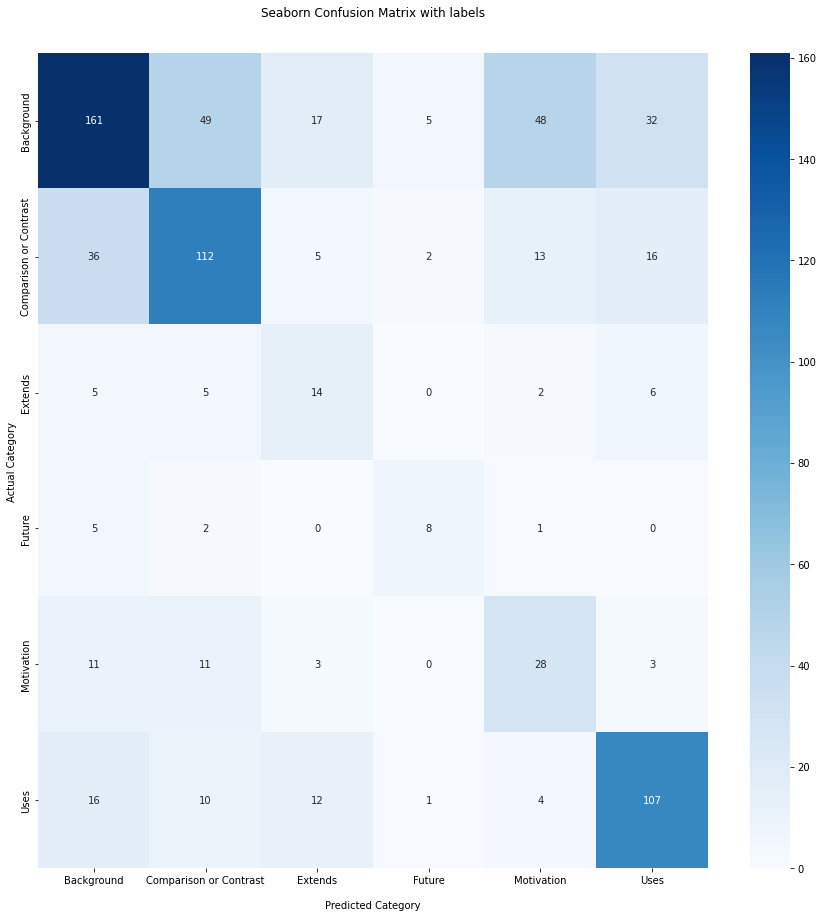

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])
ax.yaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
classifier = CitationClassifier1(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

print(classifier)

CitationClassifier1(
  (elmo): Elmo(
    (_elmo_lstm): _ElmoBiLm(
      (_token_embedder): _ElmoCharacterEncoder(
        (char_conv_0): Conv1d(16, 32, kernel_size=(1,), stride=(1,))
        (char_conv_1): Conv1d(16, 32, kernel_size=(2,), stride=(1,))
        (char_conv_2): Conv1d(16, 64, kernel_size=(3,), stride=(1,))
        (char_conv_3): Conv1d(16, 128, kernel_size=(4,), stride=(1,))
        (char_conv_4): Conv1d(16, 256, kernel_size=(5,), stride=(1,))
        (char_conv_5): Conv1d(16, 512, kernel_size=(6,), stride=(1,))
        (char_conv_6): Conv1d(16, 1024, kernel_size=(7,), stride=(1,))
        (_highways): Highway(
          (_layers): ModuleList(
            (0): Linear(in_features=2048, out_features=4096, bias=True)
            (1): Linear(in_features=2048, out_features=4096, bias=True)
          )
        )
        (_projection): Linear(in_features=2048, out_features=512, bias=True)
      )
      (_elmo_lstm): ElmoLstm(
        (forward_layer_0): LstmCellWithProjection(
   

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=1.719692890460674	 val_acc=24.289940828402358
Epoch 1	 val_loss=1.6697691908249488	 val_acc=30.157790927021694
Epoch 2	 val_loss=1.66982148702328	 val_acc=23.4516765285996
Epoch 3	 val_loss=1.6245218469546392	 val_acc=36.73570019723866
Epoch 4	 val_loss=1.5736908316612246	 val_acc=31.29191321499014
Epoch 5	 val_loss=1.5527082269008343	 val_acc=39.60552268244577
Epoch 6	 val_loss=1.5557293662658107	 val_acc=42.61341222879685
Epoch 7	 val_loss=1.565962667648609	 val_acc=37.99802761341223
Epoch 8	 val_loss=1.5086034444662242	 val_acc=43.58974358974359
Epoch 9	 val_loss=1.4952526459327111	 val_acc=47.1992110453649
Epoch 10	 val_loss=1.4972015252480142	 val_acc=47.45562130177515
Epoch 11	 val_loss=1.515115742500012	 val_acc=49.89151873767258
Epoch 12	 val_loss=1.4912122488021853	 val_acc=51.70611439842209
Epoch 13	 val_loss=1.498764409468724	 val_acc=51.814595660749504
Epoch 14	 val_loss=1.4865687397810128	 val_acc=49.89151873767258
Epoch 15	 val_loss=1.4869731114460871	 v

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 4, 0, 0, 3, 0, 5, 0, 0, 0, 4, 0, 0, 0,
        5, 0], device='cuda:0')

In [ ]:
prediction.pop()

tensor([4, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 5, 0, 1, 0, 5, 0, 4, 0, 1, 0, 5, 1,
        5, 1], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

                        precision    recall  f1-score   support

            Background       0.64      0.45      0.53       312
Comparison or Contrast       0.53      0.55      0.54       184
               Extends       0.26      0.34      0.29        32
                Future       0.26      0.69      0.37        16
            Motivation       0.34      0.54      0.42        56
                  Uses       0.62      0.69      0.65       150

              accuracy                           0.53       750
             macro avg       0.44      0.54      0.47       750
          weighted avg       0.56      0.53      0.54       750



In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

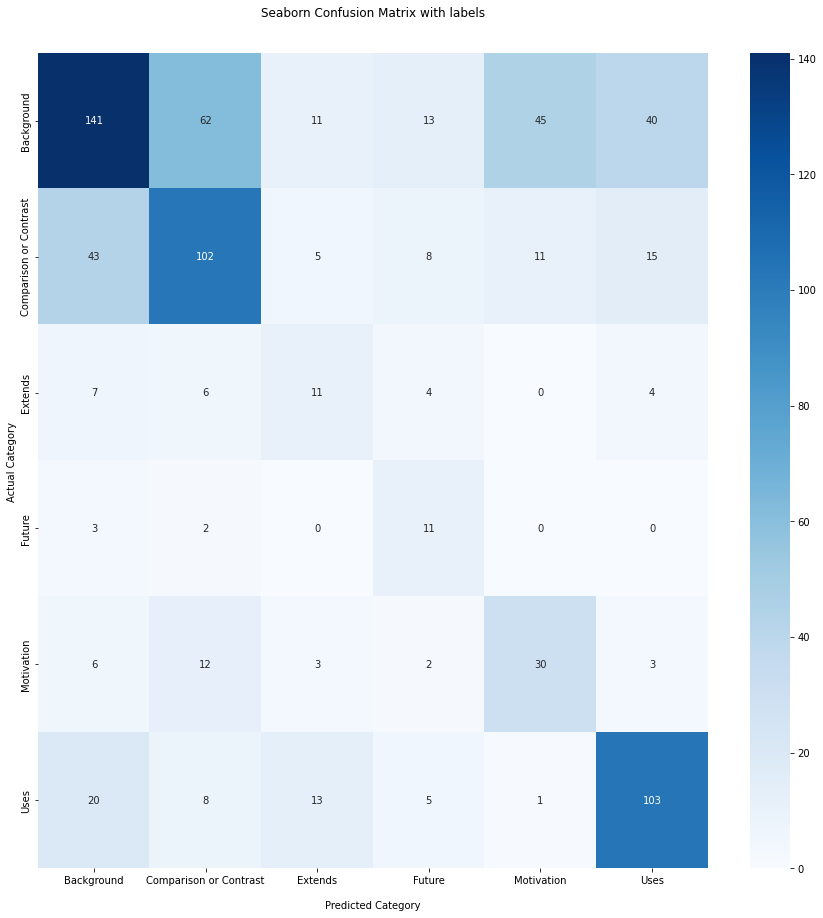

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])
ax.yaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
classifier = CitationClassifier(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=1.79153815141091	 val_acc=24.477317554240635
Epoch 1	 val_loss=1.791683838917659	 val_acc=24.477317554240635
Epoch 2	 val_loss=1.7909414814068725	 val_acc=24.733727810650894
Epoch 3	 val_loss=1.7879743346801171	 val_acc=22.16962524654832
Epoch 4	 val_loss=1.7840090439869807	 val_acc=21.913214990138062
Epoch 5	 val_loss=1.7854546812864454	 val_acc=23.579881656804734
Epoch 6	 val_loss=1.7763543358215919	 val_acc=21.124260355029588
Epoch 7	 val_loss=1.7765335394785955	 val_acc=20.098619329388555
Epoch 8	 val_loss=1.7680684969975395	 val_acc=20.355029585798814
Epoch 9	 val_loss=1.7715105276841385	 val_acc=19.714003944773175
Epoch 10	 val_loss=1.7648750176796546	 val_acc=20.907297830374752
Epoch 11	 val_loss=1.7683894817645731	 val_acc=19.329388560157785
Epoch 12	 val_loss=1.7787442665833693	 val_acc=21.873767258382646
Epoch 13	 val_loss=1.7728796876393829	 val_acc=20.591715976331358
Epoch 14	 val_loss=1.775839801018055	 val_acc=20.97633136094674
Epoch 15	 val_loss=1.76367

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 4, 0, 0, 3, 0, 5, 0, 0, 0, 4, 0, 0, 0,
        5, 0], device='cuda:0')

In [ ]:
prediction.pop()

tensor([1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1,
        1, 1], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

                        precision    recall  f1-score   support

            Background       0.57      0.01      0.03       312
Comparison or Contrast       0.32      0.80      0.46       184
               Extends       0.14      0.03      0.05        32
                Future       0.02      0.38      0.04        16
            Motivation       0.00      0.00      0.00        56
                  Uses       0.14      0.02      0.03       150

              accuracy                           0.22       750
             macro avg       0.20      0.21      0.10       750
          weighted avg       0.35      0.22      0.13       750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

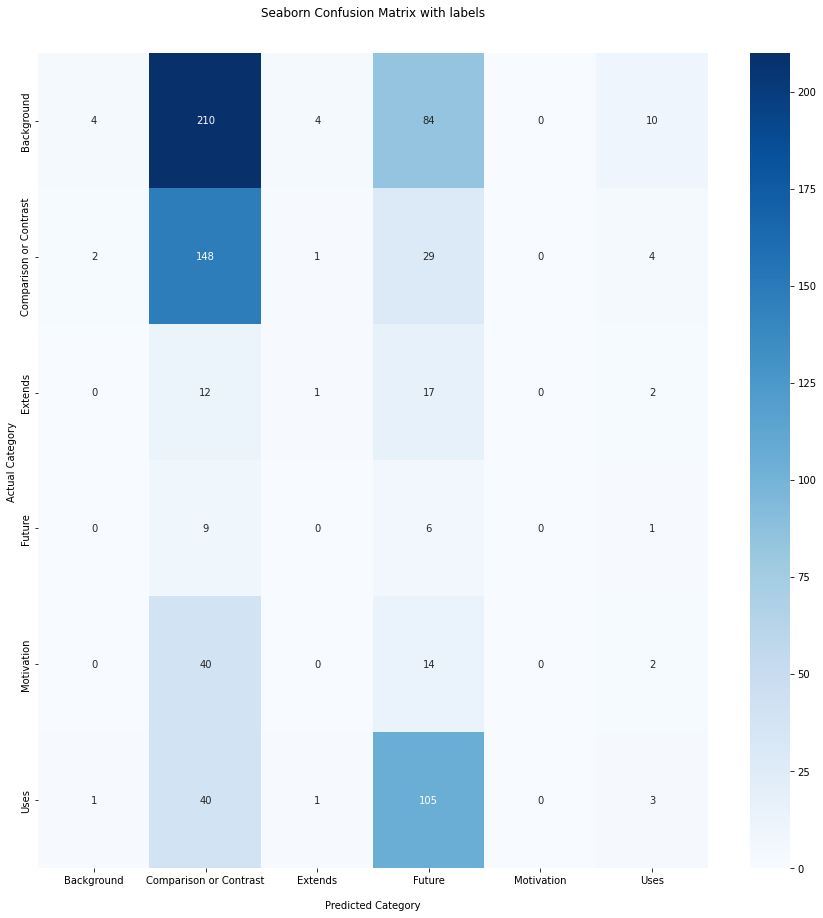

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])
ax.yaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# if you could generate a global attentive sentence vector and use that for classsification
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class Attention(nn.Module):
    def __init__(self, feature_dim, step_dim, bias=True, **kwargs):
        super(Attention, self).__init__(**kwargs)
        
        self.supports_masking = True

        self.bias = bias
        self.feature_dim = feature_dim
        self.step_dim = step_dim
        self.features_dim = 0
        
        weight = torch.zeros(feature_dim, 1)
        nn.init.kaiming_uniform_(weight)
        self.weight = nn.Parameter(weight)
        
        if bias:
            self.b = nn.Parameter(torch.zeros(step_dim))
        
    def forward(self, x, mask=None):
        # print("x.shape")
        # print(x.shape)
        feature_dim = self.feature_dim 
        # print(feature_dim)
        step_dim = self.step_dim
        # print(step_dim)

        eij = torch.mm(x.contiguous().view(-1, feature_dim), self.weight).view(-1, step_dim)
        # print("eij.shape")
        # print(eij.shape)
        
        if self.bias:
            eij = eij + self.b
            
        eij = torch.tanh(eij)
        a = torch.exp(eij)
        
        if mask is not None:
            a = a * mask

        a = a / (torch.sum(a, 1, keepdim=True) + 1e-10)

        weighted_input = x * torch.unsqueeze(a, -1)
        return torch.sum(weighted_input, 1)

class CitationClassifier(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        # self.attention_layer = Attention(hidden_dim*2)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print(elmo_out['elmo_representations'][0].shape)
        # print("x.shape")
        # print(x.shape)
        
        packed_output, (hidden, cell) = self.lstm(x)
        l=packed_output.shape[1]
        l=torch.tensor(l)
        l=l.cuda()
        h=torch.tensor(64)
        h=h.cuda()
        self.attention_layer = Attention(h,l).cuda()
        packed_output = self.attention_layer(packed_output)
        # print(packed_output.shape)
        #packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        out = self.fc1(packed_output)
        # print(out.shape)
        out = self.relu(out)
        # print(out.shape)
        out = self.fc2(out)
        # print(out.shape)
        pred1= self.act(out)
        # print(pred1.shape)
        return pred1

In [ ]:
classifier = CitationClassifier(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=1.7380598966891954	 val_acc=17.623274161735697
Epoch 1	 val_loss=1.7219795355430016	 val_acc=18.668639053254434
Epoch 2	 val_loss=1.7487483070446896	 val_acc=15.68047337278107
Epoch 3	 val_loss=1.6577328902024486	 val_acc=25.355029585798814
Epoch 4	 val_loss=1.6305872293619004	 val_acc=24.309664694280077
Epoch 5	 val_loss=1.6059963473906884	 val_acc=29.97041420118343
Epoch 6	 val_loss=1.6010905320827777	 val_acc=30.502958579881657
Epoch 7	 val_loss=1.5974958859957182	 val_acc=31.291913214990135
Epoch 8	 val_loss=1.6152951946625342	 val_acc=28.471400394477314
Epoch 9	 val_loss=1.59677974994366	 val_acc=30.502958579881657
Epoch 10	 val_loss=1.582916305615352	 val_acc=33.83629191321499
Epoch 11	 val_loss=1.5981063063328083	 val_acc=28.727810650887573
Epoch 12	 val_loss=1.5748676336728609	 val_acc=31.46942800788955
Epoch 13	 val_loss=1.5701389817091136	 val_acc=31.29191321499014
Epoch 14	 val_loss=1.5478274592986474	 val_acc=37.465483234714014
Epoch 15	 val_loss=1.5858235

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 4, 0, 0, 3, 0, 5, 0, 0, 0, 4, 0, 0, 0,
        5, 0], device='cuda:0')

In [ ]:
prediction.pop()

tensor([4, 1, 2, 1, 2, 5, 1, 4, 1, 1, 1, 0, 2, 4, 2, 0, 5, 4, 4, 4, 1, 0, 5, 5,
        5, 1], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

                        precision    recall  f1-score   support

            Background       0.58      0.23      0.33       312
Comparison or Contrast       0.37      0.48      0.42       184
               Extends       0.23      0.34      0.27        32
                Future       0.35      0.75      0.48        16
            Motivation       0.26      0.52      0.35        56
                  Uses       0.54      0.71      0.61       150

              accuracy                           0.42       750
             macro avg       0.39      0.50      0.41       750
          weighted avg       0.48      0.42      0.41       750



In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

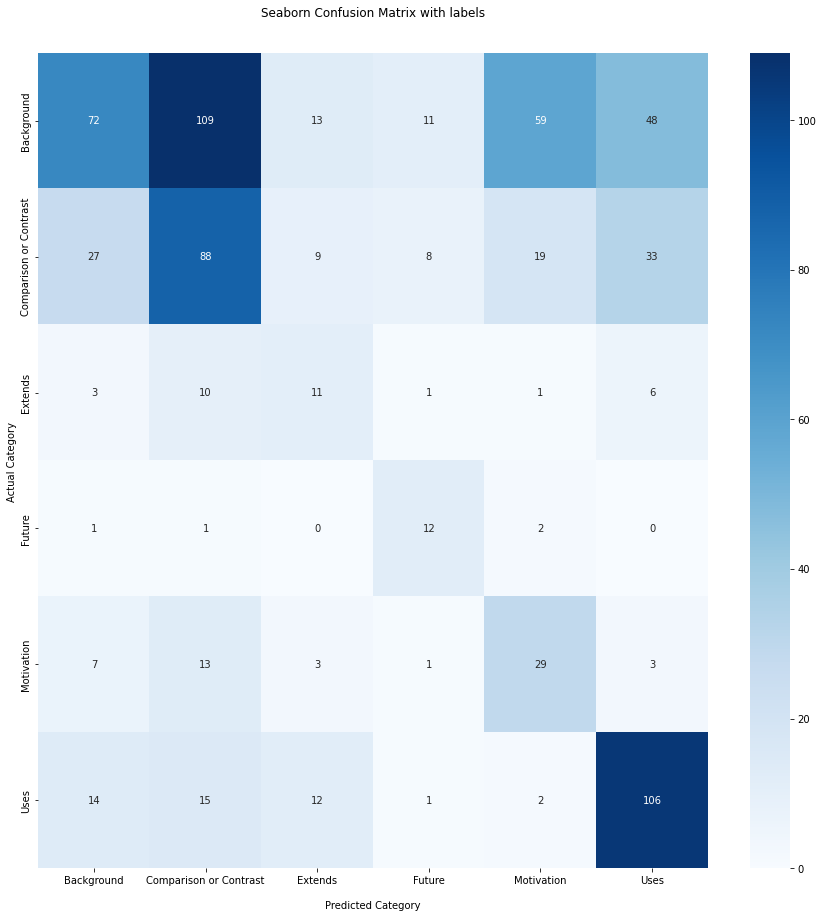

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])
ax.yaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#whether you can replace the sentence vector with max pooling of the sentence (as the sentence vector)
# bilstm output of citseg
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class CitationClassifier1(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier1, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print("x.shape")
        # print(x.shape)
        packed_output, (hidden, cell) = self.lstm(x)
        #packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        packed_output=torch.max(packed_output, 1)
        out = self.fc1(packed_output)
        out = self.relu(out)
        out = self.fc2(out)
        pred1= self.act(out)
        return pred1

In [ ]:
classifier = CitationClassifier(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=1.7422622304696302	 val_acc=21.449704142011832
Epoch 1	 val_loss=1.7257383053119364	 val_acc=18.303747534516763
Epoch 2	 val_loss=1.6828494438758264	 val_acc=31.804733727810646
Epoch 3	 val_loss=1.662358765418713	 val_acc=29.773175542406314
Epoch 4	 val_loss=1.633981438783499	 val_acc=33.10650887573964
Epoch 5	 val_loss=1.6334838271141052	 val_acc=28.944773175542405
Epoch 6	 val_loss=1.622224454696362	 val_acc=34.51676528599605
Epoch 7	 val_loss=1.6830303164628835	 val_acc=25.759368836291916
Epoch 8	 val_loss=1.6049794921508203	 val_acc=36.587771203155825
Epoch 9	 val_loss=1.6277677554350636	 val_acc=31.20315581854043
Epoch 10	 val_loss=1.6024628281593323	 val_acc=33.51084812623275
Epoch 11	 val_loss=1.6044215468259957	 val_acc=39.42800788954635
Epoch 12	 val_loss=1.6070656593029318	 val_acc=30.818540433925044
Epoch 13	 val_loss=1.5570961557901823	 val_acc=39.40828402366864
Epoch 14	 val_loss=1.576441498903128	 val_acc=38.08678500986194
Epoch 15	 val_loss=1.5506341778

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 4, 0, 0, 3, 0, 5, 0, 0, 0, 4, 0, 0, 0,
        5, 0], device='cuda:0')

In [ ]:
prediction.pop()

tensor([4, 0, 1, 1, 2, 1, 0, 4, 1, 1, 1, 1, 2, 4, 5, 1, 5, 4, 0, 0, 4, 1, 5, 5,
        5, 1], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

                        precision    recall  f1-score   support

            Background       0.61      0.33      0.42       312
Comparison or Contrast       0.48      0.57      0.52       184
               Extends       0.14      0.38      0.21        32
                Future       0.38      0.50      0.43        16
            Motivation       0.26      0.54      0.35        56
                  Uses       0.66      0.63      0.64       150

              accuracy                           0.47       750
             macro avg       0.42      0.49      0.43       750
          weighted avg       0.54      0.47      0.48       750



In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

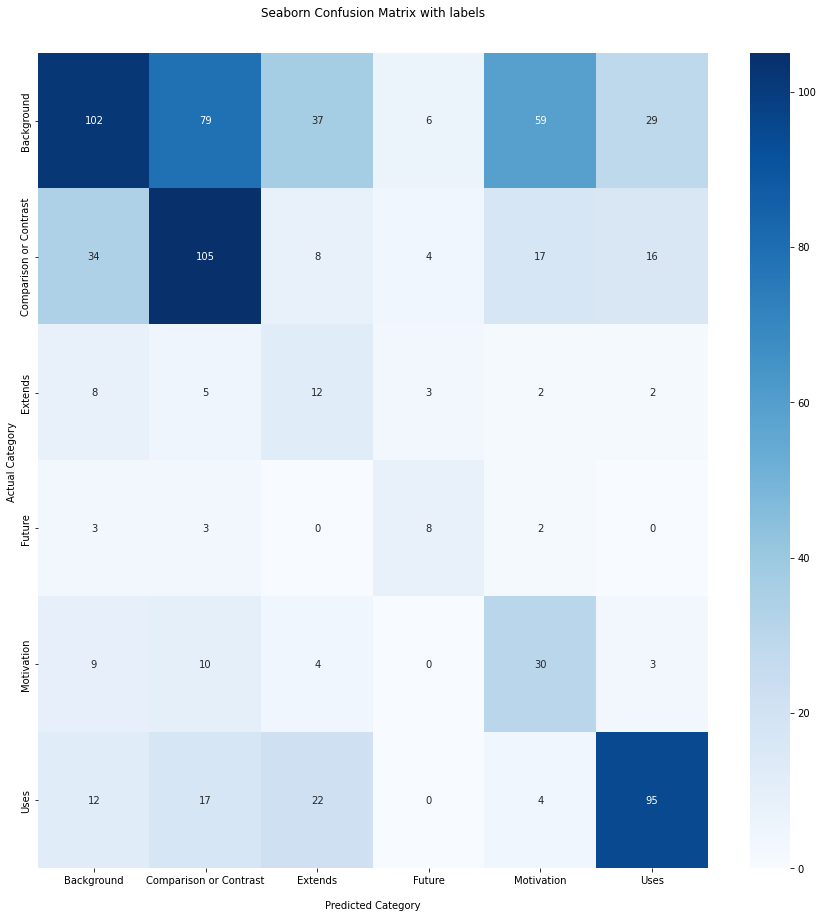

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])
ax.yaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# if you could append a global attentive sentence vector to citeseg and send the new feature vector for classsification
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class Attention(nn.Module):
    def __init__(self, feature_dim, step_dim, bias=True, **kwargs):
        super(Attention, self).__init__(**kwargs)
        
        self.supports_masking = True

        self.bias = bias
        self.feature_dim = feature_dim
        self.step_dim = step_dim
        self.features_dim = 0
        
        weight = torch.zeros(feature_dim, 1)
        nn.init.kaiming_uniform_(weight)
        self.weight = nn.Parameter(weight)
        
        if bias:
            self.b = nn.Parameter(torch.zeros(step_dim))
        
    def forward(self, x, mask=None):
        # print("x.shape")
        # print(x.shape)
        feature_dim = self.feature_dim 
        # print(feature_dim)
        step_dim = self.step_dim
        # print(step_dim)

        eij = torch.mm(x.contiguous().view(-1, feature_dim), self.weight).view(-1, step_dim)
        # print("eij.shape")
        # print(eij.shape)
        
        if self.bias:
            eij = eij + self.b
            
        eij = torch.tanh(eij)
        a = torch.exp(eij)
        
        if mask is not None:
            a = a * mask

        a = a / (torch.sum(a, 1, keepdim=True) + 1e-10)

        weighted_input = x * torch.unsqueeze(a, -1)
        return torch.sum(weighted_input, 1)

class CitationClassifier(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        # self.attention_layer = Attention(hidden_dim*2)
        self.fc1 = nn.Linear(hidden_dim*2*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print(elmo_out['elmo_representations'][0].shape)
        # print("x.shape")
        # print(x.shape)
        
        packed_output, (hidden, cell) = self.lstm(x)
        l=packed_output.shape[1]
        l=torch.tensor(l)
        l=l.cuda()
        h=torch.tensor(64)
        h=h.cuda()
        self.attention_layer = Attention(h,l).cuda()
        packed_output1 = self.attention_layer(packed_output)
        # print(packed_output.shape)
        packed_output2=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        att_citeseg=torch.cat([packed_output1,packed_output2],dim=1)
        out = self.fc1(att_citeseg)
        # print(out.shape)
        out = self.relu(out)
        # print(out.shape)
        out = self.fc2(out)
        # print(out.shape)
        pred1= self.act(out)
        # print(pred1.shape)
        return pred1

In [ ]:
classifier = CitationClassifier(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=1.751748511424431	 val_acc=11.873767258382646
Epoch 1	 val_loss=1.6640843657346878	 val_acc=28.74753451676528
Epoch 2	 val_loss=1.615272925450252	 val_acc=33.086785009861934
Epoch 3	 val_loss=1.6229400864014258	 val_acc=31.035502958579883
Epoch 4	 val_loss=1.5674900366709785	 val_acc=36.291913214990146
Epoch 5	 val_loss=1.6631905895013075	 val_acc=27.14990138067061
Epoch 6	 val_loss=1.5551675374691303	 val_acc=37.70216962524655
Epoch 7	 val_loss=1.5313053543751054	 val_acc=41.77514792899408
Epoch 8	 val_loss=1.5287981583521915	 val_acc=44.00394477317554
Epoch 9	 val_loss=1.5318859082001903	 val_acc=41.26232741617357
Epoch 10	 val_loss=1.535936048397651	 val_acc=52.140039447731745
Epoch 11	 val_loss=1.5301985648962164	 val_acc=46.26232741617356
Epoch 12	 val_loss=1.5205820936423082	 val_acc=49.85207100591716
Epoch 13	 val_loss=1.5246257827832148	 val_acc=46.518737672583825
Epoch 14	 val_loss=1.496401860163762	 val_acc=51.83431952662722
Epoch 15	 val_loss=1.493952297247

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 4, 0, 0, 3, 0, 5, 0, 0, 0, 4, 0, 0, 0,
        5, 0], device='cuda:0')

In [ ]:
prediction.pop()

tensor([4, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 5, 4, 0, 0, 1, 0, 0, 5,
        5, 1], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

                        precision    recall  f1-score   support

            Background       0.65      0.47      0.55       312
Comparison or Contrast       0.54      0.57      0.55       184
               Extends       0.23      0.34      0.28        32
                Future       0.42      0.69      0.52        16
            Motivation       0.33      0.54      0.41        56
                  Uses       0.62      0.67      0.64       150

              accuracy                           0.54       750
             macro avg       0.46      0.55      0.49       750
          weighted avg       0.57      0.54      0.55       750



In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

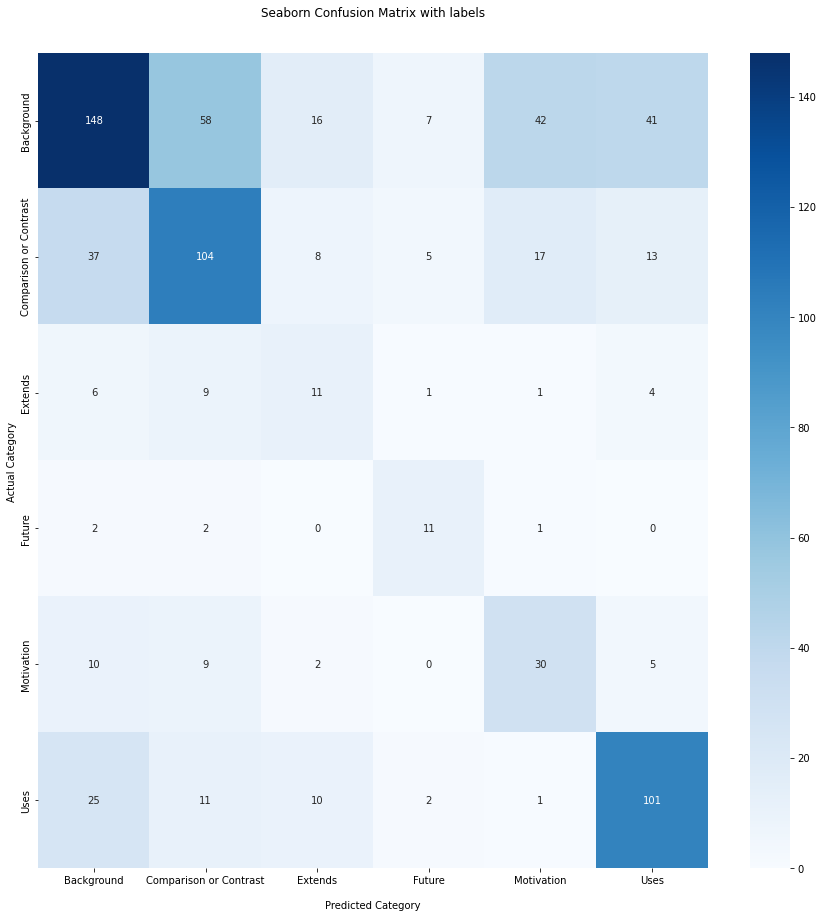

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])
ax.yaxis.set_ticklabels(["Background","Comparison or Contrast","Extends","Future","Motivation","Uses"])

## Display the visualization of the Confusion Matrix.
plt.show()